# **🚀 Air Quality Index (AQI) Prediction Model**

**Author** - _Prashant Kumar_

## 📌 1. Introduction
Air pollution has become a serious environmental concern, and predicting the Air Quality Index (AQI) can help in mitigating its impact. In this project, we will develop a machine learning model to predict AQI using historical air quality data.


## 📌 2. Dataset
**🗂 Path:** `C:/Users/prash/Downloads/air quality data.csv`

The dataset contains various pollutant levels along with AQI values. Our goal is to analyze the data, preprocess it, and build a predictive model.


## ✅ 3. Steps in the Project

### 💡 3.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 📌 3.2 Loading & Evaluation of the Dataset

#### 🔹 3.2.1 Loading of Dataset

In [2]:
df = pd.read_csv("C:/Users/prash/Downloads/air quality data.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


#### 🔹 3.2.2 Evaluation of the Data

In [13]:
# Shape - rows & Columns
df.shape

(6236, 16)

In [14]:
# information
df.info

<bound method DataFrame.info of        City  Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2  \
2123      0   878  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24   
2124      0   879  78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96   
2125      0   880  88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59   
2126      0   881  64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00   
2127      0   882  72.47  114.84  5.23  23.20  16.59  12.25  0.16  10.55   
...     ...   ...    ...     ...   ...    ...    ...    ...   ...    ...   
29525     8  1822   7.63   32.27  5.91  23.27  17.19  11.15  0.46   6.87   
29526     8  1823  15.02   50.94  7.68  25.06  19.54  12.47  0.47   8.55   
29527     8  1824  24.38   74.09  3.42  26.06  16.53  11.99  0.52  12.72   
29528     8  1825  22.91   65.73  3.45  29.53  18.33  10.71  0.48   8.42   
29529     8  1826  16.64   49.97  4.05  29.26  18.80  10.03  0.52   9.84   

           O3  Benzene  Toluene  Xylene    AQI  AQI_Buc

In [16]:
# To know the Duplicate values
df.duplicated().sum()


0

In [17]:
# To check Missing Values
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [20]:
# Summary of Statistics in the Dataset
df.describe()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
count,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000
mean,4.197723,1234.405228,61.327365,123.418321,17.015191,31.708190,32.448956,20.737070,0.984344,11.514426,36.127691,3.700361,10.323696,2.557439,140.510103,2.020526
std,2.569240,472.623317,53.709682,85.791491,20.037836,18.784041,27.388129,16.088215,1.356161,7.166113,19.553695,5.062159,12.287223,4.535060,92.738826,1.303833
min,0.000000,0.000000,2.000000,7.800000,0.250000,0.170000,0.170000,0.120000,0.000000,0.710000,1.550000,0.000000,0.000000,0.000000,23.000000,0.000000
25%,2.750000,941.000000,27.927500,66.970000,5.080000,15.977500,14.547500,10.390000,0.490000,6.557500,22.357500,0.910000,2.210000,0.300000,78.000000,1.000000
50%,5.000000,1350.000000,47.490000,103.010000,10.060000,28.900000,24.285000,14.690000,0.730000,9.875000,32.540000,2.435000,6.310000,1.250000,112.000000,2.000000
75%,6.000000,1634.250000,73.442500,150.770000,19.392500,43.632500,39.622500,28.545000,1.060000,14.430000,45.512500,4.620000,13.040000,3.030000,166.000000,3.000000
max,8.000000,1827.000000,639.190000,796.880000,159.220000,140.170000,224.090000,166.700000,16.230000,70.390000,162.330000,64.440000,103.000000,125.180000,677.000000,5.000000


In [21]:
# Summary of Statistics in the Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
City,6236.0,4.197723,2.569240,0.00,2.7500,5.000,6.0000,8.00
Date,6236.0,1234.405228,472.623317,0.00,941.0000,1350.000,1634.2500,1827.00
PM2.5,6236.0,61.327365,53.709682,2.00,27.9275,47.490,73.4425,639.19
PM10,6236.0,123.418321,85.791491,7.80,66.9700,103.010,150.7700,796.88
NO,6236.0,17.015191,20.037836,0.25,5.0800,10.060,19.3925,159.22
NO2,6236.0,31.708190,18.784041,0.17,15.9775,28.900,43.6325,140.17
NOx,6236.0,32.448956,27.388129,0.17,14.5475,24.285,39.6225,224.09
NH3,6236.0,20.737070,16.088215,0.12,10.3900,14.690,28.5450,166.70
CO,6236.0,0.984344,1.356161,0.00,0.4900,0.730,1.0600,16.23
SO2,6236.0,11.514426,7.166113,0.71,6.5575,9.875,14.4300,70.39


In [23]:
# Percentage (%) of the Null Values
null_values_percentage = (df.isnull().sum() / df.shape[0]) * 100
null_values_percentage = null_values_percentage.sort_values(ascending=False)
null_values_percentage


City          0.0
Date          0.0
PM2.5         0.0
PM10          0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
Benzene       0.0
Toluene       0.0
Xylene        0.0
AQI           0.0
AQI_Bucket    0.0
dtype: float64

PM10       38.638972
PM2.5      19.199956
O3         11.310613
NO2         9.926985
NH3         6.492221
NO          5.327001
SO2         3.604858
Toluene     3.232073
Benzene     1.158484
Xylene      0.800666
CO          0.308172
dtype: float64


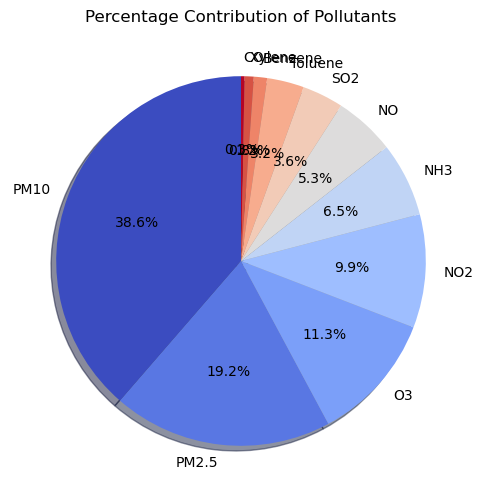

In [24]:
# Summing up all pollutant columns
pollutant_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']  # Modify based on actual column names in your dataset

# Calculating the total pollution sum
total_pollution = df[pollutant_columns].sum().sum()

# Calculating the percentage contribution of each pollutant
pollution_percentage = (df[pollutant_columns].sum() / total_pollution) * 100

# Displaying the results
pollution_percentage = pollution_percentage.sort_values(ascending=False)
print(pollution_percentage)

# 📊 Visualizing the pollution contribution using a pie chart
plt.figure(figsize=(10,6))
pollution_percentage.plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm', startangle=90, shadow=True)
plt.title("Percentage Contribution of Pollutants")
plt.ylabel('')  # Hide the y-label
plt.show()


### 💡 3.3 Data Preprocessing
🔹 Handling missing values

🔹 Removing duplicates

🔹 Converting categorical values if any

In [3]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

### 📊 3.4 Exploratory Data Analysis (EDA)

#### 💡 Understanding Air Pollutants

- **PM2.5 and PM10**  
  - **PM2.5**: Particulate matter with a diameter of 2.5 micrometers or less, considered "fine particulate matter" and can penetrate deep into the lungs.  
  - **PM10**: Particulate matter with a diameter of 10 micrometers or less, considered "inhalable particulate matter".  

- **Nitrogen Oxides (NO and NO2)**  
  - **NO (Nitric Oxide)**: A gas formed during combustion processes.  
  - **NO2 (Nitrogen Dioxide)**: A more harmful pollutant formed when NO reacts with oxygen in the atmosphere.  

- **Other pollutants**  
  - **NH3 (Ammonia)**: A colorless gas with a pungent odor, often emitted from agricultural activities.  
  - **CO (Carbon Monoxide)**: A colorless, odorless gas mainly produced by incomplete combustion of fossil fuels.  
  - **SO2 (Sulfur Dioxide)**: A gas with a strong odor, primarily from burning fossil fuels containing sulfur.  
  - **O3 (Ozone)**: A secondary pollutant formed by the reaction of sunlight with other chemicals in the atmosphere.  
  - **Benzene, Toluene, Xylene (BTEX)**: Volatile organic compounds often associated with vehicle emissions and industrial processes.  

#### 🔎 Correlation Analysis
Now, let's analyze how these pollutants correlate with each other and AQI.

```python
# Selecting only numerical columns for correlation analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

🔎 Checking correlation between features

📈 Distribution of AQI values

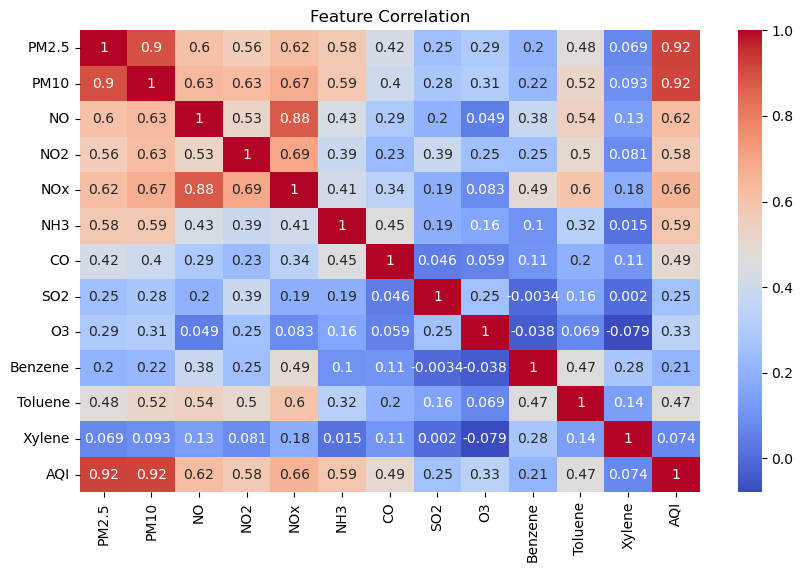

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


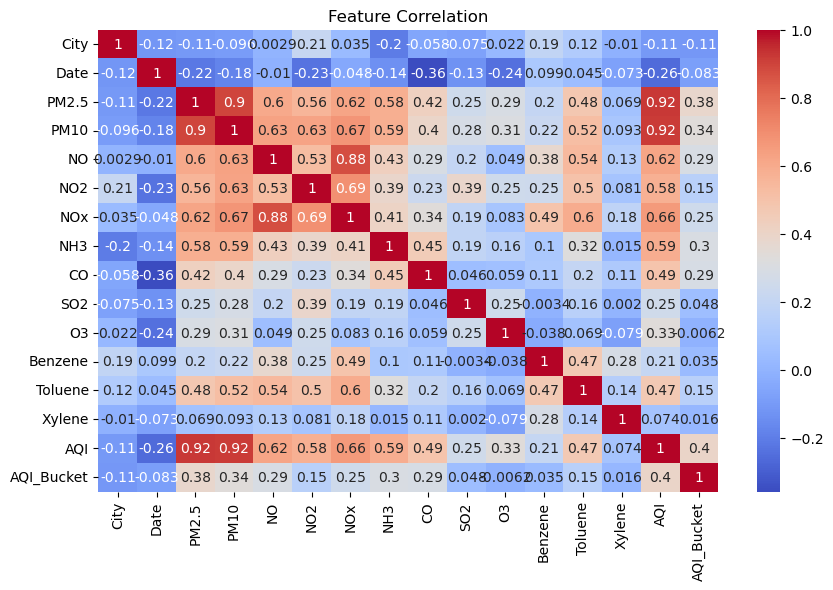

In [7]:
from sklearn.preprocessing import LabelEncoder

# Identify non-numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Now, retry the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


### 📌 3.5 Splitting Data for Model Training

In [9]:
X = df.drop(columns=['AQI'])  # Features
y = df['AQI']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🚀 3.6 Model Training and Evaluation
#### 🔹 3.6.1 Linear Regression

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#### 🔹 3.6.2 Random Forest Regressor

In [11]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### ✅ 3.7 Model Evaluation

In [12]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"📌 {model_name} Performance:")
    print(f"✅ MAE: {mean_absolute_error(y_true, y_pred)}")
    print(f"✅ MSE: {mean_squared_error(y_true, y_pred)}")
    print(f"✅ R2 Score: {r2_score(y_true, y_pred)}")
    print("\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

📌 Linear Regression Performance:
✅ MAE: 18.11293494321414
✅ MSE: 641.6762211130691
✅ R2 Score: 0.9228774051307689


📌 Random Forest Performance:
✅ MAE: 10.739270833333334
✅ MSE: 224.89711049679485
✅ R2 Score: 0.9729697810680619




### 🎯 3.8 Conclusion
Based on the results, the model with the highest accuracy and lowest error will be considered the best choice for AQI prediction.


# 📌 Contributions & Feedback are Welcome!

***📩 Feel free to reach out if you have any suggestions or improvements. 🚀***